In [29]:
!pip install matplotlib seaborn pandas


  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
      --------------------------------------- 0.0/2.3 MB 146.3 kB/s eta 0:00:16
      --------------------------------------- 0.0/2.3 MB 164.3 kB/s eta 0:00:14
      --------------------------------------- 0.1/2.3 MB 175.0 kB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyspark-connect 4.0.1 requires googleapis-common-protos>=1.65.0, which is not installed.
pyspark-connect 4.0.1 requires grpcio>=1.67.0, which is not installed.
pyspark-connect 4.0.1 requires grpcio-status>=1.67.0, which is not installed.
pyspark-connect 4.0.1 requires pyarrow>=11.0.0, which is not installed.
pyspark-client 4.0.1 requires googleapis-common-protos>=1.65.0, which is not installed.
pyspark-client 4.0.1 requires grpcio>=1.67.0, which is not installed.
pyspark-client 4.0.1 requires grpcio-status>=1.67.0, which is not installed.
pyspark-client 4.0.1 requires pyarrow>=11.0.0, which is not installed.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
!pip install mpd3

ERROR: Could not find a version that satisfies the requirement mpd3 (from versions: none)
ERROR: No matching distribution found for mpd3

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("All packages installed successfully!")


All packages installed successfully!


Spark session created. Version: 4.0.1


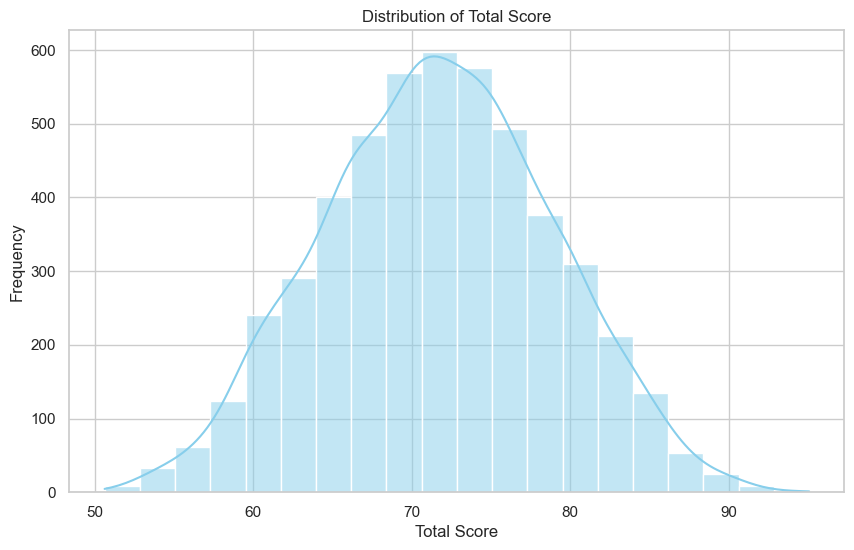

C:\Users\jukan\AppData\Local\Temp\ipykernel_13680\660687307.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total_Score', data=pdf, palette='pastel')


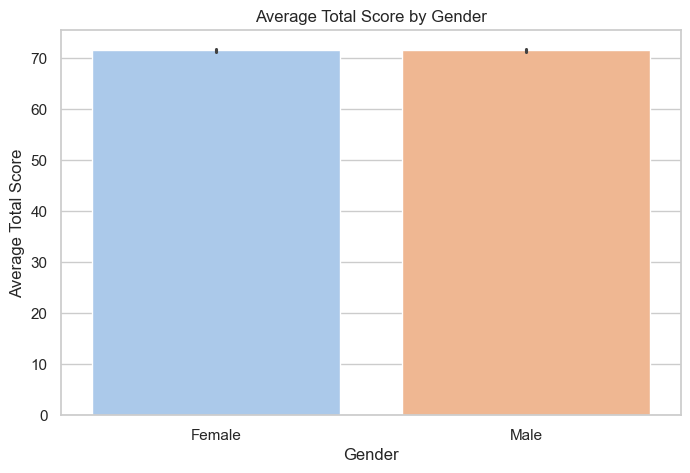

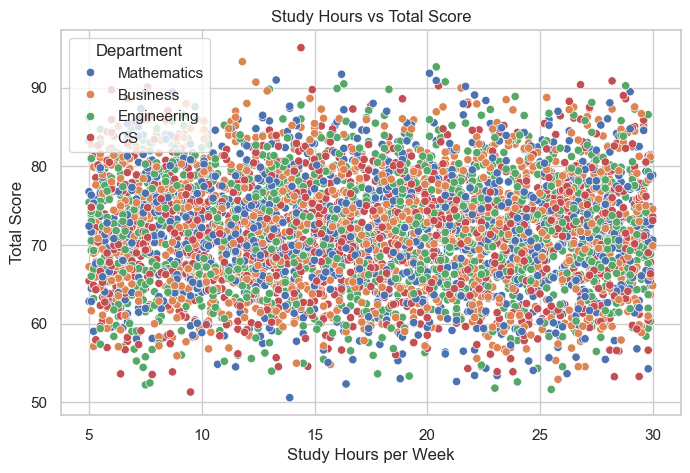

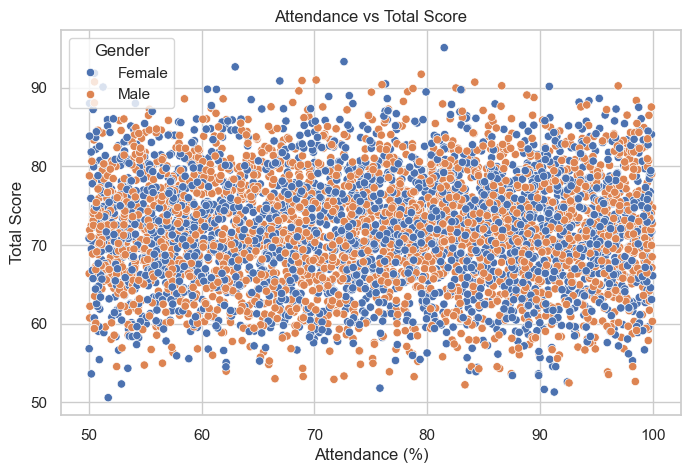

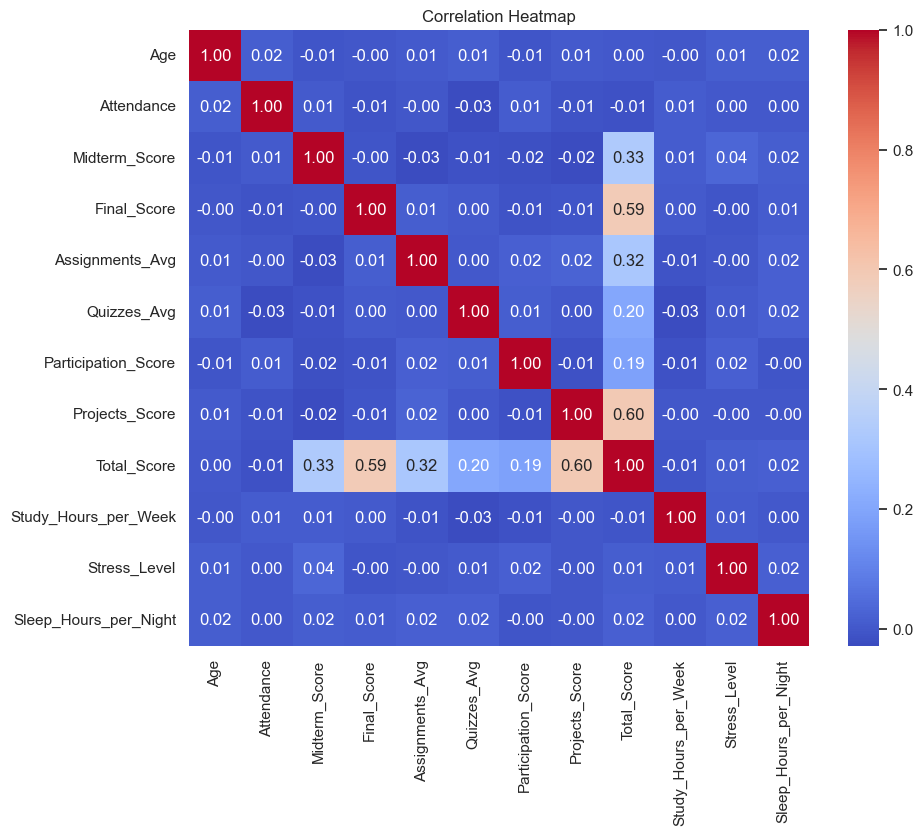

Analysis completed successfully.


In [47]:
# student_performance_analysis.py

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean
from pyspark.sql.types import IntegerType, FloatType
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 1: Initialize Spark
# -------------------------
spark = SparkSession.builder \
    .appName("StudentPerformanceAnalysis") \
    .master("local[*]") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .getOrCreate()

print("Spark session created. Version:", spark.version)

# -------------------------
# Step 2: Load Dataset
# -------------------------
input_file = r"C:/Users/jukan/Downloads/StudentsPerformanceDataset.csv"
df = spark.read.csv(input_file, header=True, inferSchema=True)

# -------------------------
# Step 3: Basic Cleaning
# -------------------------
# Rename columns
df = df.withColumnRenamed("Attendance (%)", "Attendance") \
       .withColumnRenamed("Stress_Level (1-10)", "Stress_Level")

# Fill numeric missing values with mean
numeric_cols = ['Age', 'Attendance', 'Midterm_Score', 'Final_Score', 
                'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
                'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
                'Stress_Level', 'Sleep_Hours_per_Night']

for col_name in numeric_cols:
    avg_value = df.select(mean(col(col_name))).collect()[0][0]
    df = df.fillna({col_name: avg_value})

# Fill categorical missing values with 'Unknown'
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities', 
                    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']
for col_name in categorical_cols:
    df = df.fillna({col_name: 'Unknown'})

# Correct data types
for c in ['Age', 'Stress_Level']:
    df = df.withColumn(c, col(c).cast(IntegerType()))
for c in ['Attendance', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 
          'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score',
          'Study_Hours_per_Week', 'Sleep_Hours_per_Night']:
    df = df.withColumn(c, col(c).cast(FloatType()))

# -------------------------
# Step 4: Convert to Pandas for plotting
# -------------------------
pdf = df.toPandas()

# -------------------------
# Step 5: Plot Analysis Graphs
# -------------------------
sns.set(style="whitegrid")

# 1. Distribution of Total Score
plt.figure(figsize=(10,6))
sns.histplot(pdf['Total_Score'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

# 2. Average Total Score by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Gender', y='Total_Score', data=pdf, palette='pastel')
plt.title('Average Total Score by Gender')
plt.ylabel('Average Total Score')
plt.show()

# 3. Study Hours vs Total Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', hue='Department', data=pdf)
plt.title('Study Hours vs Total Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.show()

# 4. Attendance vs Total Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Attendance', y='Total_Score', hue='Gender', data=pdf)
plt.title('Attendance vs Total Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Total Score')
plt.show()
# Convert PySpark DataFrame to pandas
pdf = df.toPandas()

# Ensure numeric columns are actually numeric
numeric_cols = ['Age', 'Attendance', 'Midterm_Score', 'Final_Score', 
                'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
                'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
                'Stress_Level', 'Sleep_Hours_per_Night']

for col in numeric_cols:
    pdf[col] = pd.to_numeric(pdf[col], errors='coerce')  # convert non-numeric to NaN

# 5. Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(pdf[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# -------------------------
# Step 6: Stop Spark
# -------------------------
spark.stop()
print("Analysis completed successfully.")
